
Analysis Results:
Optimal number of clusters (LRE Method): 4
WCSS Calculation Time: 0.0002 seconds
LRE Method Time: 0.0005 seconds
Total Runtime: 0.0007 seconds

The distance of each point to the reference line:
k=1: Distance = 0.0000
k=2: Distance = 10.0569
k=3: Distance = 14.9156
k=4: Distance = 19.4229
k=5: Distance = 18.5947
k=6: Distance = 17.7678
k=7: Distance = 16.9575
k=8: Distance = 16.1068
k=9: Distance = 15.2155
k=10: Distance = 14.3898
k=11: Distance = 13.4905
k=12: Distance = 12.5477
k=13: Distance = 11.6641
k=14: Distance = 10.7233
k=15: Distance = 9.7887
k=16: Distance = 8.8545
k=17: Distance = 7.8706
k=18: Distance = 6.8863
k=19: Distance = 5.9060
k=20: Distance = 4.9237
k=21: Distance = 3.9423
k=22: Distance = 2.9584
k=23: Distance = 1.9708
k=24: Distance = 0.9880
k=25: Distance = 0.0000


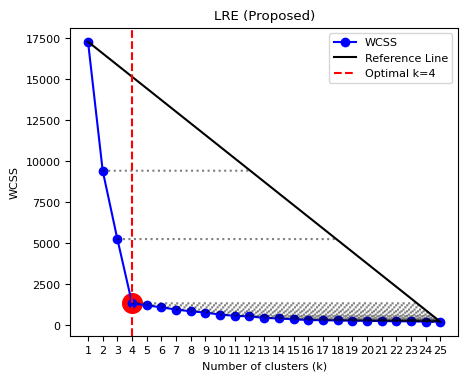

In [10]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

# ======================== MAIN FUNCTIONS ========================
def calculate_line_equation(p1, p2):
    """Calculate the equation of the line Ax + By + C = 0 through 2 points"""
    x1, y1 = p1
    x2, y2 = p2
    A = y2 - y1
    B = x1 - x2
    C = (x2 * y1) - (x1 * y2)
    return A, B, C

def find_perpendicular_point(point, A, B, C):
    """Finding the perpendicular projection of a point onto a line"""
    x, y = point
    denominator = A**2 + B**2
    x_proj = (B*(B*x - A*y) - A*C) / denominator
    y_proj = (A*(-B*x + A*y) - B*C) / denominator
    return (x_proj, y_proj)



def lre_method(wcss):
    start_time = time.time()
    """Determining optimal clusters with LRE"""
    k_range = np.arange(1, len(wcss)+1)  # Make sure the dimensions match with wcss

    # Make sure wcss and k_range have the same length
    assert len(k_range) == len(wcss), "k_range and wcss dimensions do not match!"

    A, B, C = calculate_line_equation((k_range[0], wcss[0]), (k_range[-1], wcss[-1]))

    distances = []
    perpendicular_lines = []
    for k, w in zip(k_range, wcss):
        proj = find_perpendicular_point((k, w), A, B, C)
        distance = np.sqrt((k-proj[0])**2 + (w-proj[1])**2)
        distances.append(distance)
        perpendicular_lines.append([(k, w), proj])

    optimal_k = k_range[np.argmax(distances)]
    runtime = time.time() - start_time
    return optimal_k, distances, runtime, perpendicular_lines, (A, B, C)

# ======================== IMPLEMENTATION ========================
# Load dataset Iris
df = pd.read_excel('uni.xlsx')
X = df.values  # Assume the last column is not a label
wcss_start_time = time.time()
def calculate_wcss(X, max_k=25):
    """Calculating WCSS for various values ​​of k"""
    wcss = []

    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        wcss.append(kmeans.inertia_)

    return wcss
wcss_time = time.time() - wcss_start_time
# Calculate WCSS (make sure max_k is equal to the number of points in the plot)
max_k = 25
wcss = calculate_wcss(X, max_k=max_k)

# Apply LRE Method
optimal_k, distances, lre_time, perpendicular_lines, line_params = lre_method(wcss)
total_time = wcss_time + lre_time
A, B, C = line_params
kmeans_models = []

# ======================== VISUALIZATION ========================
plt.figure(figsize=(5, 4))

# 1. Plot LRE Method
#plt.subplot(1, 2, 1)
k_range = np.arange(1, len(wcss)+1)  # Make sure k_range matches wcss

# Plot WCSS
plt.plot(k_range, wcss, 'bo-', label='WCSS')

# Reference line plot
plt.plot([k_range[0], k_range[-1]], [wcss[0], wcss[-1]], 'k-', label='Reference Line')

# Perpendicular line plot
for line in perpendicular_lines:
    plt.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], 'k:', alpha=0.5)

# Optimal point
plt.rcParams['font.size'] = 8
plt.scatter(optimal_k, wcss[optimal_k-1], s=200, c='red', marker='o')
plt.axvline(x=optimal_k, linestyle='--', color='r', label=f'Optimal k={optimal_k}')
plt.title('LRE (Proposed)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.legend()

# Analysis Results
print("\nAnalysis Results:")
print(f"Optimal number of clusters (LRE Method): {optimal_k}")
print(f"WCSS Calculation Time: {wcss_time:.4f} seconds")
print(f"LRE Method Time: {lre_time:.4f} seconds")
print(f"Total Runtime: {total_time:.4f} seconds")


# Show distance for each k
print("\nThe distance of each point to the reference line:")
for k, dist in zip(k_range, distances):
    print(f"k={k}: Distance = {dist:.4f}")